Data Mining
ALP
Michelle Chandra - 0706022010019

# IMPORT LIBRARY

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hie
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import statistics
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from collections import Counter
!pip install kneed
from kneed import KneeLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# LOAD DATASET

In [3]:
url = "https://raw.githubusercontent.com/michellechandraa/tugas/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv"
df = pd.read_csv(url)
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


# DATA PREPROCESSING

In [4]:
#Cek apabila ada NaN atau tidak
df.isna().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

In [5]:
#Cek apa ada row yang duplikat
df.duplicated().sum()

0

In [6]:
#Menampilkan info dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


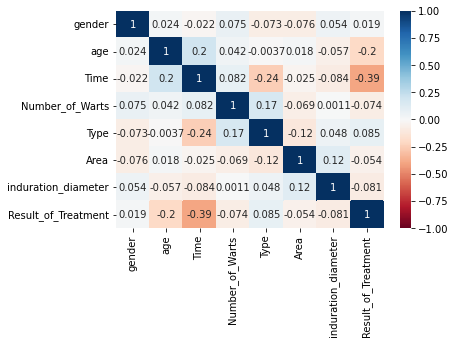

In [7]:
#Menampilkan korelasi antar kolom
sns.heatmap(df.corr(method='spearman'), cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()

# Handling Missing Values
Karena ini data medis, maka tidak dapat sembarangan mengisi value yang kosong. Sehingga menggunakan metode Regression Analysis dengan korelasi antar kolom yang paling bagus

Fill NaN in column 'Time' using machine learning Regression Analysis

In [8]:
#Separate the null values from the data frame (df) and create a variable “test”
test = df.loc[df['Time'].isna()]
test

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,1,38,NaN,8.0,2.0,56,45.0,1
50,1,54,NaN,13.0,3.0,43,5.0,1
72,2,28,NaN,4.0,1.0,9,2.0,1


In [9]:
#Drop the null values from the data frame (df) and represent them as ‘train data”
#Bcs if not drop the null values, we can't do the linear regression
df2 = df.copy()
df2.dropna(subset=['Time'],inplace=True)
df2.dropna(subset=['Type'], inplace=True)
df2

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
83,2,48,10.25,7.0,1.0,50,25.0,1
84,2,49,9.00,4.0,2.0,14,9.0,1
85,2,51,4.00,1.0,1.0,65,7.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1


In [10]:
#Make the 'age' and 'Type' column from df2 as X_train
X_train = df2[['age', 'Type']] #Just using these columns bcs the correlation with 'Time' is the highest
X_train

,age,Type
0,15,1.0
1,27,1.0
2,32,1.0
3,33,2.0
4,34,3.0
...,...,...
83,48,1.0
84,49,2.0
85,51,1.0
87,52,1.0


In [11]:
#Make the 'Time' column from df2 as y_train
y_train = df2['Time']
y_train

0     11.00
1     11.75
2     12.00
3      1.75
4      5.00
      ...  
83    10.25
84     9.00
85     4.00
87     2.25
88    10.00
Name: Time, Length: 82, dtype: float64

In [12]:
#Now we build the Linear Regression model
lr=LinearRegression().fit(X_train, y_train)
lr

LinearRegression()

In [13]:
#From the column 'age' and 'Type' of test data, we create the X_test
X_test = test[['age', 'Type']]
X_test

,age,Type
43,38,2.0
50,54,3.0
72,28,1.0


In [14]:
#Apply the model on X_test of test data to make predictions
y_pred = lr.predict(X_test)
y_pred

array([7.33115535, 7.18296274, 7.79153686])

In [15]:
#Now we fill the result of the prediction in variable filler
filler = y_pred
filler = ['%.2f' % elem for elem in filler] #To make from 7.33115535 to 7.33
filler

['7.33', '7.18', '7.79']

In [16]:
#fill the Nan in column 'Time' with filler
df.loc[df.Time.isnull(), 'Time'] = filler
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.0,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.0,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.0,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.0,1.0,1.0,65,7.0,1
86,2,51,6.0,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.0,1.0,2.0,30,25.0,1


In [17]:
#Check if there is any NaN in column 'Time'
df['Time'].isna().sum()

0

Fill NaN in column 'Number_of_Warts' using machine learning Regression Analysis

In [18]:
#Separate the null values from the data frame (df) and create a variable “test”
test = df.loc[df['Number_of_Warts'].isna()]
test

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
1,1,27,11.75,NaN,1.0,208,6.0,0


In [19]:
#Drop the null values from the data frame (df) and represent them as ‘train data”
#Bcs if not drop the null values, we can't do the linear regression
df2 = df.copy()
df2.dropna(subset=['Number_of_Warts'],inplace=True)
df2.dropna(subset=['Type'], inplace=True)
df2

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.0,6.0,1.0,30,25.0,0
2,1,32,12.0,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.0,7.0,3.0,64,7.0,0
5,1,38,12.0,14.0,1.0,87,6.0,0
...,...,...,...,...,...,...,...,...
83,2,48,10.25,7.0,1.0,50,25.0,1
84,2,49,9.0,4.0,2.0,14,9.0,1
85,2,51,4.0,1.0,1.0,65,7.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1


In [20]:
#Make the 'Time' and 'Type' column from df2 as X_train
X_train = df2[['Time', 'Type']]
X_train

,Time,Type
0,11.0,1.0
2,12.0,1.0
3,1.75,2.0
4,5.0,3.0
5,12.0,1.0
...,...,...
83,10.25,1.0
84,9.0,2.0
85,4.0,1.0
87,2.25,1.0


In [21]:
#Make the 'Time' column from df2 as y_train
y_train = df2['Number_of_Warts']
y_train

0      6.0
2      9.0
3      7.0
4      7.0
5     14.0
      ... 
83     7.0
84     4.0
85     1.0
87     5.0
88     1.0
Name: Number_of_Warts, Length: 84, dtype: float64

In [22]:
#Now we build the Linear Regression model
lr=LinearRegression().fit(X_train, y_train)
lr

LinearRegression()

In [23]:
#From the column 'Time' and 'Type' of test data, we create the X_test
X_test = test[['Time', 'Type']]
X_test

,Time,Type
1,11.75,1.0


In [24]:
#Apply the model on X_test of test data to make predictions
y_pred = lr.predict(X_test)
y_pred

array([5.97779305])

In [25]:
#Now we fill the result of the prediction in variable filler
filler = y_pred
filler = ['%.1f' % elem for elem in filler] #To make from 5.97779305 to 6
filler

['6.0']

In [26]:
#fill the Nan in column 'Number_of_Warts' with filler
df.loc[df.Number_of_Warts.isnull(), 'Number_of_Warts'] = filler
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.0,6.0,1.0,30,25.0,0
1,1,27,11.75,6.0,1.0,208,6.0,0
2,1,32,12.0,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.0,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.0,1.0,1.0,65,7.0,1
86,2,51,6.0,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.0,1.0,2.0,30,25.0,1


In [27]:
#Check if there is any NaN in column 'Number_of_Warts'
df['Number_of_Warts'].isna().sum()

0

Fill NaN in column 'Type' using machine learning Regression Analysis

In [28]:
df2 = df.loc[df['Type'].isna()]
df2

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
10,2,26,10.5,6.0,NaN,50,9.0,0
26,1,20,8.0,6.0,NaN,45,8.0,1
66,2,23,6.75,6.0,NaN,19,2.0,1
86,2,51,6.0,6.0,NaN,80,2.0,1
89,2,53,7.25,6.0,NaN,81,7.0,1


In [29]:
#Separate the null values from the data frame (df) and create a variable “test”
test = df.loc[df['Type'].isna()]
test

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
10,2,26,10.5,6.0,NaN,50,9.0,0
26,1,20,8.0,6.0,NaN,45,8.0,1
66,2,23,6.75,6.0,NaN,19,2.0,1
86,2,51,6.0,6.0,NaN,80,2.0,1
89,2,53,7.25,6.0,NaN,81,7.0,1


In [30]:
#Drop the null values from the data frame (df) and represent them as ‘train data”
#Bcs if not drop the null values, we can't do the linear regression
df2 = df.copy()
df2.dropna(subset=['Type'],inplace=True)
df2

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.0,6.0,1.0,30,25.0,0
1,1,27,11.75,6.0,1.0,208,6.0,0
2,1,32,12.0,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.0,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
83,2,48,10.25,7.0,1.0,50,25.0,1
84,2,49,9.0,4.0,2.0,14,9.0,1
85,2,51,4.0,1.0,1.0,65,7.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1


In [31]:
#Make the 'Time' and 'Number_of_Warts' column from df2 as X_train
X_train = df2[['Time', 'Number_of_Warts']]
X_train

,Time,Number_of_Warts
0,11.0,6.0
1,11.75,6.0
2,12.0,9.0
3,1.75,7.0
4,5.0,7.0
...,...,...
83,10.25,7.0
84,9.0,4.0
85,4.0,1.0
87,2.25,5.0


In [32]:
#Make the 'Type' column from df2 as y_train
y_train = df2['Type']
y_train

0     1.0
1     1.0
2     1.0
3     2.0
4     3.0
     ... 
83    1.0
84    2.0
85    1.0
87    1.0
88    2.0
Name: Type, Length: 85, dtype: float64

In [33]:
#Now we build the Linear Regression model
lr=LinearRegression().fit(X_train, y_train)
lr

LinearRegression()

In [34]:
#From the column 'Time' and 'Number_of_Warts' of test data, we create the X_test
X_test = test[['Time', 'Number_of_Warts']]
X_test

,Time,Number_of_Warts
10,10.5,6.0
26,8.0,6.0
66,6.75,6.0
86,6.0,6.0
89,7.25,6.0


In [35]:
#Apply the model on X_test of test data to make predictions
y_pred = lr.predict(X_test)
y_pred

array([1.51294164, 1.69167468, 1.78104119, 1.8346611 , 1.74529459])

In [36]:
#Now we fill the result of the prediction in variable filler
filler = y_pred
filler = ['%.0f' % elem for elem in filler] #To make from 5.97779305 to 6
filler

['2', '2', '2', '2', '2']

In [37]:
#fill the Nan in column 'Type' with filler
df.loc[df.Type.isnull(), 'Type'] = filler
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.0,6.0,1.0,30,25.0,0
1,1,27,11.75,6.0,1.0,208,6.0,0
2,1,32,12.0,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.0,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.0,1.0,1.0,65,7.0,1
86,2,51,6.0,6.0,2,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.0,1.0,2.0,30,25.0,1


In [38]:
#Check if there is any NaN in column 'Type'
df['Type'].isna().sum()

0

Fill NaN in column 'induration_diameter' using machine learning Regression Analysis

In [39]:
df2 = df.loc[df['induration_diameter'].isna()]
df2

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
19,1,15,4.0,4.0,3.0,25,NaN,1
53,2,15,6.5,19.0,1.0,56,NaN,1


In [40]:
#Separate the null values from the data frame (df) and create a variable “test”
test = df.loc[df['induration_diameter'].isna()]
test

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
19,1,15,4.0,4.0,3.0,25,NaN,1
53,2,15,6.5,19.0,1.0,56,NaN,1


In [41]:
#Drop the null values from the data frame (df) and represent them as ‘train data”
#Bcs if not drop the null values, we can't do the linear regression
df2 = df.copy()
df2.dropna(subset=['induration_diameter'],inplace=True)
df2

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.0,6.0,1.0,30,25.0,0
1,1,27,11.75,6.0,1.0,208,6.0,0
2,1,32,12.0,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.0,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.0,1.0,1.0,65,7.0,1
86,2,51,6.0,6.0,2,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.0,1.0,2.0,30,25.0,1


In [42]:
#Make the 'Time' and 'Area' column from df2 as X_train
X_train = df2[['Time', 'Area']]
X_train

,Time,Area
0,11.0,30
1,11.75,208
2,12.0,43
3,1.75,379
4,5.0,64
...,...,...
85,4.0,65
86,6.0,80
87,2.25,63
88,10.0,30


In [43]:
#Make the 'induration_diameter' column from df2 as y_train
y_train = df2['induration_diameter']
y_train

0     25.0
1      6.0
2     50.0
3      7.0
4      7.0
      ... 
85     7.0
86     2.0
87     7.0
88    25.0
89     7.0
Name: induration_diameter, Length: 88, dtype: float64

In [44]:
#Now we build the Linear Regression model
lr=LinearRegression().fit(X_train, y_train)
lr

LinearRegression()

In [45]:
#From the column 'Time' and 'Area' of test data, we create the X_test
X_test = test[['Time', 'Area']]
X_test

,Time,Area
19,4.0,25
53,6.5,56


In [46]:
#Apply the model on X_test of test data to make predictions
y_pred = lr.predict(X_test)
y_pred

array([16.95962072, 14.76241536])

In [47]:
#Now we fill the result of the prediction in variable filler
filler = y_pred
filler = ['%.0f' % elem for elem in filler] #To make from 5.97779305 to 6
filler

['17', '15']

In [48]:
#fill the Nan in column 'induration_diameter' with filler
df.loc[df.induration_diameter.isnull(), 'induration_diameter'] = filler
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.0,6.0,1.0,30,25.0,0
1,1,27,11.75,6.0,1.0,208,6.0,0
2,1,32,12.0,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.0,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.0,1.0,1.0,65,7.0,1
86,2,51,6.0,6.0,2,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.0,1.0,2.0,30,25.0,1


In [49]:
#Check if there is any NaN in column 'induration_diameter'
df['induration_diameter'].isna().sum()

0

Make sure that all columns are free from NaN

In [50]:
df.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

# Exploratory Data Analysis

In [51]:
#Cek Dtype dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               90 non-null     int64 
 1   age                  90 non-null     int64 
 2   Time                 90 non-null     object
 3   Number_of_Warts      90 non-null     object
 4   Type                 90 non-null     object
 5   Area                 90 non-null     int64 
 6   induration_diameter  90 non-null     object
 7   Result_of_Treatment  90 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 5.8+ KB


In [52]:
#Ganti Dtype untuk 'Time', 'Number_of_Warts', 'Type', 'induration_diameter' dari object ke float
df[['Time', 'Number_of_Warts', 'Type', 'induration_diameter']] = df[['Time', 'Number_of_Warts', 'Type', 'induration_diameter']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     float64
 4   Type                 90 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  90 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [53]:
#Deskripsi data
df.describe()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.544444,31.044444,7.228333,6.122222,1.766667,95.700000,14.533333,0.788889
std,0.500811,12.235435,3.098361,4.207612,0.807966,136.614643,17.183870,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,2.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,9.937500,8.750000,2.000000,80.750000,13.500000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


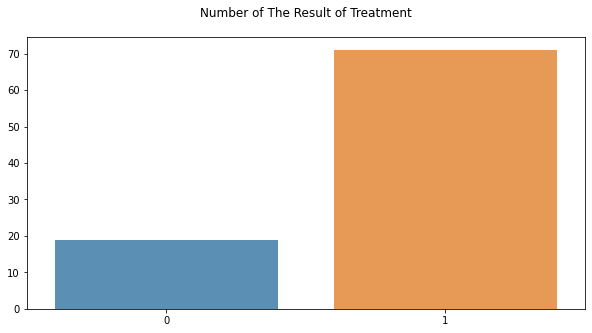

In [54]:
result_count = df['Result_of_Treatment'].value_counts()
plt.figure(figsize=(10,5))
plt.title('Number of The Result of Treatment', pad=20)
sns.barplot(x=result_count.index, y=result_count.values, alpha=0.8)
plt.show()

Barplot diatas menunjukan adanya ketidakseimbangan pada kategori result, dengan 1 lebih banyak dari 0. Oversampling menggunakan SMOTE akan menjadi pilihan yang baik untuk ini.

# Visualization

Dari histogram ini, kita menemukan bahwa banyak juga pasien yang ada diumur 20an

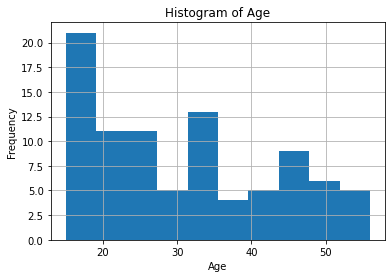

In [55]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

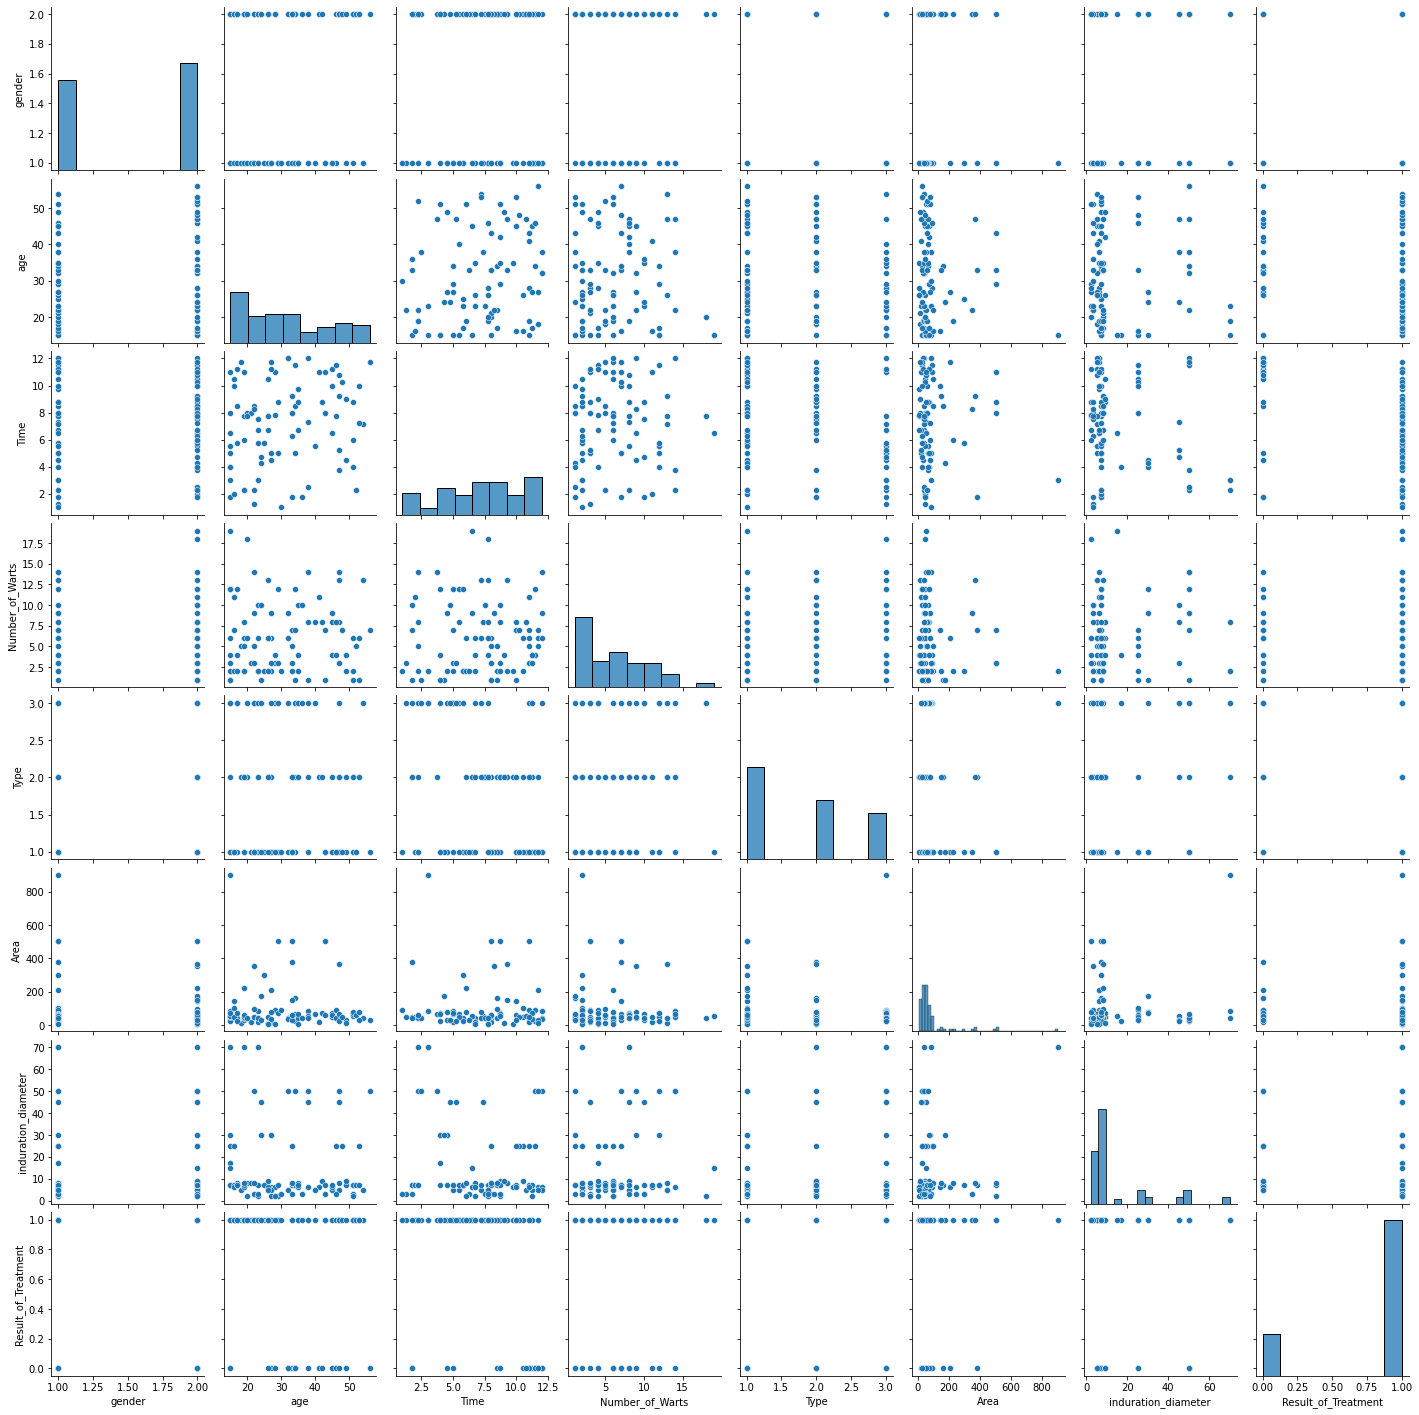

In [56]:
sns.pairplot(df)
plt.show()

# Assigning Features and Target Variables

In [57]:
# Predictor Variabels
X = df.iloc[:, :-1].values

# Target Variabel
y = df.iloc[:, -1].values

In [58]:
# Resampling using SMOTE to balance number of samples among classes
over_sample = SMOTE()
X, y = over_sample.fit_resample(X, y)

Class=0, n=71 (50.000%)
Class=1, n=71 (50.000%)


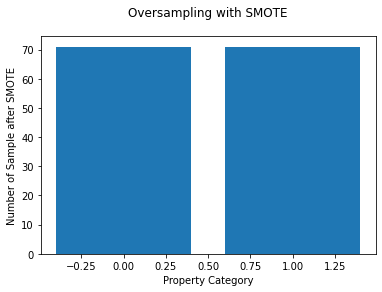

In [59]:
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.title('Oversampling with SMOTE', pad=20)
plt.xlabel('Property Category')
plt.ylabel('Number of Sample after SMOTE')
plt.show()

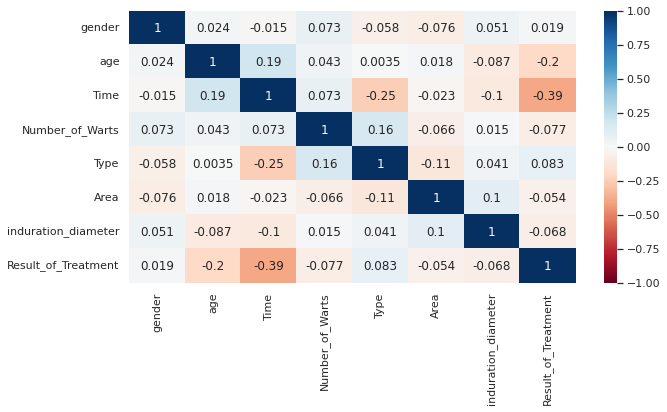

In [60]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(df.corr(method='spearman'), cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()

In [61]:
df.groupby('Result_of_Treatment')["age", "Time", "Number_of_Warts", "Area", "induration_diameter"].mean()

<ipython-input-61-91c815d1f203>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Result_of_Treatment')["age", "Time", "Number_of_Warts", "Area", "induration_diameter"].mean()


,age,Time,Number_of_Warts,Area,induration_diameter
Result_of_Treatment,,,,,
0,35.473684,9.381579,6.421053,84.315789,15.368421
1,29.859155,6.652113,6.042254,98.746479,14.309859


In [62]:
df.groupby('Result_of_Treatment')["gender", "Type"].agg(pd.Series.mode)

<ipython-input-62-bd051132a1b9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Result_of_Treatment')["gender", "Type"].agg(pd.Series.mode)


,gender,Type
Result_of_Treatment,,
0,2,1.0
1,2,1.0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [64]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression

In [65]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = regressor.predict(X_test)
y_pred

array([0.39864846, 0.72364705, 0.39216166, 0.46506301, 0.37196512,
       0.13959908, 0.30874831, 0.40560424, 0.52405865, 0.6078475 ,
       0.21099458, 0.24425543, 0.59188094, 0.44640054, 0.79962226,
       0.53608445, 0.24138716, 0.32145278, 0.26536063, 0.29760308,
       0.61229232, 0.63889144, 0.36879919, 0.53501019, 0.70209591,
       0.0714291 , 0.59743894, 0.5464321 , 0.59342234, 0.34480068,
       0.17189393, 0.52156008, 0.51190496, 0.3614173 , 0.44649698,
       0.35797625, 0.85072667, 0.3535367 , 0.77263531, 0.76478456,
       0.62563218, 0.105524  , 0.4255454 ])

Evaluasi hasil akhir dari Linear Regression ini didapati bahwa R-squared nya 0.269, adjusted R-square nya 0.231 dan RMSE nya 17.775. Dengan intercept 1.3346 dan koefisien tertera di summary OLS summary. Didapati pula banyak P-value diatas 0.05 

In [67]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     5.216
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           2.79e-05
Time:                        23:15:11   Log-Likelihood:                -85.953
No. Observations:                 142   AIC:                             187.9
Df Residuals:                     134   BIC:                             211.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1997      0.238      5.041      0.0

In [68]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error
RMSE = mse(y_test, y_pred)
print(np.sqrt(RMSE))

0.4584727252432663


# Logistic Regression

In [ ]:
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
log_y_pred = log_classifier.predict(X_test)
log_y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
log_cm = confusion_matrix(y_test, log_y_pred)
print("Confusion Matrix:\n", log_cm)
print("LOG Accuracy Score: ", accuracy_score(y_test, log_y_pred))
print('LOG F1 Score: ', f1_score(y_test, log_y_pred, average='micro'))
print()

Confusion Matrix:
 [[18  2]
 [ 8 15]]
LOG Accuracy Score:  0.7674418604651163
LOG F1 Score:  0.7674418604651162



Evaluasi hasil akhir dari Logistic Regression ini adalah didapati Accuracy Score dan F1 Score sebesar 0.767. confusion matrix nya dengan TP 18, FN 2, FP 8 dan TN 15

# KNN

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean", p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
knn_y_pred = knn_classifier.predict(X_test)
knn_y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
knn_cm = confusion_matrix(y_test, knn_y_pred)
print("Confusion Matrix:\n", knn_cm)
print("KNN Accuracy Score: ", accuracy_score(y_test, knn_y_pred))
print('KNN F1 Score: ', f1_score(y_test, knn_y_pred, average='micro'))
print()

Confusion Matrix:
 [[20  0]
 [ 8 15]]
KNN Accuracy Score:  0.813953488372093
KNN F1 Score:  0.8139534883720931



Evaluasi hasil akhir dari KNN ini adalah didapati Accuracy Score dan F1 Score sebesar 0.814. confusion matrix nya dengan TP 20, FN 0, FP 8 dan TN 15. Dalam algoritma classification, didapati bahwa KNN ini merupakan model dengan akurasi yang paling tinggi

#Naive Bayes

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb_y_pred = nb_classifier.predict(X_test)
nb_y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
nb_cm = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix:\n", nb_cm)
print("NB Accuracy Score: ", accuracy_score(y_test, nb_y_pred))
print('NB F1 Score: ', f1_score(y_test, nb_y_pred, average='micro'))
print()

Confusion Matrix:
 [[19  1]
 [13 10]]
NB Accuracy Score:  0.6744186046511628
NB F1 Score:  0.6744186046511628



Evaluasi hasil akhir dari Naive Bayes ini adalah didapati Accuracy Score dan F1 Score sebesar 0.674. confusion matrix nya dengan TP 19, FN 1, FP 13 dan TN 10. 

# K-Means

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     float64
 4   Type                 90 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  90 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


Dengan menggunakan elbow method, akan menentukan jumlah cluster yang dibentuk

In [ ]:
# set the parameter for evaluating K
X = df[["gender", "age", "Time", "Number_of_Warts", "Type", "Area", 
        "induration_diameter", "Result_of_Treatment"]]
wcss=[]
# check the inertia for each K
for i in range(1, 8): 
    kmeans_classifier = KMeans(n_clusters = i, init = "random", random_state = 42)
    kmeans_classifier.fit(X) 
    wcss.append(kmeans_classifier.inertia_)

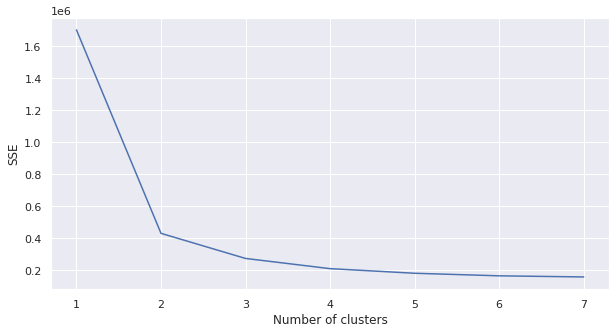

In [ ]:
plt.plot(range(1, 8), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('SSE') 
plt.show()

In [ ]:
kneedle = KneeLocator(range(1,8), wcss, curve="convex", direction="decreasing")
print("k yang paling bagus untuk model anda adalah ", kneedle.elbow)

k yang paling bagus untuk model anda adalah  2


In [ ]:
#Training model K-Means pada dataset dengan jumlah cluster yang ditentukan
kmeans_classifier = KMeans(init="random", n_clusters=2, max_iter=300, random_state=42)
kmeans_pred = kmeans_classifier.fit_predict(df)

df["KMeans"] = kmeans_pred

Tampilkan dalam bentuk dataframe kesimpulan dari cluster:

1. kolom bertipe categorical: modus
2. kolom bertipe continous : mean
3. Hasil cluster: count

In [ ]:
df.groupby("KMeans")["gender", "Type", "Result_of_Treatment"].agg(lambda x: pd.Series.mode(x).iat[0])

<ipython-input-357-6fa26351a2ae>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("KMeans")["gender", "Type", "Result_of_Treatment"].agg(lambda x: pd.Series.mode(x).iat[0])


,gender,Type,Result_of_Treatment
KMeans,,,
0,2,1.0,1
1,1,1.0,1


In [ ]:
df.groupby("KMeans")["age", "Time", "Number_of_Warts", "Area", 
                     "induration_diameter"].agg(pd.Series.mean)

<ipython-input-358-5b56b997ee2d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("KMeans")["age", "Time", "Number_of_Warts", "Area",


,age,Time,Number_of_Warts,Area,induration_diameter
KMeans,,,,,
0,31.060976,7.253659,6.158537,58.560976,14.585366
1,30.875000,6.968750,5.750000,476.375000,14.000000


In [ ]:
df.groupby("KMeans")["KMeans"].agg(pd.Series.count)

KMeans
0    82
1     8
Name: KMeans, dtype: int64

# Hierarchical

Hierarchical clustering ini menggunakan metode agglomerative.

Plot Dendrogram untuk membantu menentukan jumlah cluster, gunakan max method.

<function matplotlib.pyplot.show(*args, **kw)>

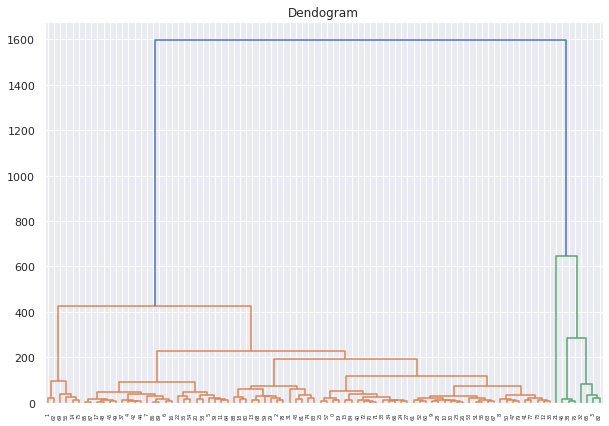

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with WARD Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df, method="ward"))
plt.title('Dendogram')
plt.show

In [ ]:
#Melakukan hierarchical clustering daengan metric Euclidean dan jumlah cluster sama dengan cluster Kmeans
agglo_clust = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
agglo_pred = agglo_clust.fit_predict(df)

df["agglo"] = agglo_pred

Menampilkan dalam bentuk dataframe, kesimpulan dari cluster dengan kriteria sama dengan kesimpulan di atas

In [ ]:
df.groupby("agglo")["gender", "Type", "Result_of_Treatment"].agg(pd.Series.mode)

<ipython-input-362-bba10ea2cdb8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("agglo")["gender", "Type", "Result_of_Treatment"].agg(pd.Series.mode)


,gender,Type,Result_of_Treatment
agglo,,,
0,1,1.0,1
1,2,1.0,1


In [ ]:
df.groupby("agglo")["age", "Time", "Number_of_Warts", "Area", 
                     "induration_diameter"].agg(pd.Series.mean)

<ipython-input-363-28036383eb6b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("agglo")["age", "Time", "Number_of_Warts", "Area",


,age,Time,Number_of_Warts,Area,induration_diameter
agglo,,,,,
0,30.875000,6.968750,5.750000,476.375000,14.000000
1,31.060976,7.253659,6.158537,58.560976,14.585366


In [ ]:
df.groupby("agglo")["agglo"].agg(pd.Series.count)

agglo
0     8
1    82
Name: agglo, dtype: int64

# Kesimpulan

Untuk dataset ini lebih bagus menggunakan algoritma Klasifikasi. Karena target variabelnya merupakan descrete value yaitu Tidak Ada Kemajuan dan Ada Kemajuan atau 0 dan 1. Hasil Permodelan yang paling bagus nilai akurasinya adalah menggunakan KNN yaitu 0.814.